### 2.1. Problem Statement: Numpy
Problem Statement 1:
Write a function so that the columns of the output matrix are powers of the input vector.
The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.
HINT: Such a matrix with a geometric progression in each row is named for Alexandre-Theophile Vandermonde.

In [1]:
import numpy as np

# Realization of the geometric progression of a matrix in terms of power of its element without numpy.vander method
def power_matrix_without_vander(input_list):
    # vector is realized as an 1d array of input list
    vector = np.array(input_list)
    length = len(input_list)
    print("\nRealization of vander matrix without vander function from left to right is as follows :\n")
    # I have used column_stack to stack the elements of 1d array as columns to get a matrix
    # Reversed(range) is used to get the realization from left to right
    print(np.column_stack([vector**(length-i-1) for i in reversed(range(length))]),"\n")
    # Logic [1,2,3] ie.,for an example take second element which is 2. Hence 2 pow (3-0-1) = 2 pow(2) = 4 and so on..
    print("\nRealization of vander matrix without vander function from right to left is as follows : \n")
    print(np.column_stack([vector**(length-i-1) for i in range(length)]))

power_matrix_without_vander([1,2,3])


def power_matrix_with_vander(input_list):
    vector = np.array(input_list)
    length = len(input_list)
    print("\nRealization of vander matrix with vander function from left to right is as follows :\n")
    print(np.vander(vector,length, increasing = True))
    print("\nRealization of vander matrix with vander function from right to left is as follows : \n")
    print(np.vander(vector,length))
    
power_matrix_with_vander([4,5,6])    


Realization of vander matrix without vander function from left to right is as follows :

[[1 1 1]
 [1 2 4]
 [1 3 9]] 


Realization of vander matrix without vander function from right to left is as follows : 

[[1 1 1]
 [4 2 1]
 [9 3 1]]

Realization of vander matrix with vander function from left to right is as follows :

[[ 1  4 16]
 [ 1  5 25]
 [ 1  6 36]]

Realization of vander matrix with vander function from right to left is as follows : 

[[16  4  1]
 [25  5  1]
 [36  6  1]]


### Problem Statement 2:
Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows:
The moving average sequence has n-k+1 elements as shown below.
The moving averages with k=4 of a ten-value sequence (n=10) is shown below
i 1 2 3 4 5 6 7 8 9 10
===== == == == == == == == == == ==
Input 10 20 30 40 50 60 70 80 90 100
y1 25 = (10+20+30+40)/4
y2 35 = (20+30+40+50)/4
y3 45 = (30+40+50+60)/4
y4 55 = (40+50+60+70)/4
y5 65 = (50+60+70+80)/4
y6 75 = (60+70+80+90)/4
y7 85 = (70+80+90+100)/4
Thus, the moving average sequence has n-k+1=10-4+1=7 values.

Question: Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [2]:
import numpy as np
def running_avg(Myarray, window):
    '''We construct a second array using numpy's ones function divisible by the window size for the convolution function 
    to apply the convolution product on distributed variables across the two different vectors which is our one 
    dimensional arrays. 'Valid' mode returns output only when the vectors overlap completely and the values outside 
    our window will not have any effect'''
    return np.convolve(Myarray, np.ones((window,))/window, mode='valid')

avg_instance_1 = running_avg ([10,20,30,40,50,60,70,80,90,100],4)
'''The result of the moving average has n-k+1 elements. In our case it is 10-4+1 = 7 elements'''
print("The moving average for the given window over the array is : ",avg_instance_1,"\n")

avg_instance_2 = running_avg ([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150],3)
'''The result of the moving average has n-k+1 elements. In our case it is 13-3+1 = 11 elements'''
print("The moving average for the given window over the array is : ",avg_instance_2)

The moving average for the given window over the array is :  [25. 35. 45. 55. 65. 75. 85.] 

The moving average for the given window over the array is :  [  5.           4.66666667   5.66666667   6.66666667   9.66666667
  28.66666667  49.33333333  72.66666667  84.          93.33333333
 116.33333333]


### 2.2. Problem Statement: Pandas
Problem Statement 1:
#### 1) How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})



In [5]:
# Program to count distance to previous zero
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# Used the Series function in pandas to acheive the the desired result
series = df['X']
# eq() is used to compare the zero's presence in the list whichh will return a boolean value
Bool = series.eq(0)
#initializing an empty list to capture the distance values of Zero
Zero_distance = []
i = 1
# Using a for loop and iterating through the list of boolean vlaues for comparision 
for val in Bool:
    if val == False:
        Zero_distance.append(i)
        i = i+1
    elif val == True:
        i = 0
        Zero_distance.append(i)
        i = i+1
# Adding the distance column to the dataframe         
df["Zero's distance"] = Zero_distance
print(df)

   X  Zero's distance
0  7                1
1  2                2
2  0                0
3  3                1
4  4                2
5  2                3
6  5                4
7  0                0
8  3                1
9  4                2


#### 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

#### 3) Find the sum of the values in s for every Wednesday

#### 4) Average For each calendar month

#### 5)For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [8]:
import pandas as pd
import numpy as np

np.random.seed(100)
# The bdate_range function is used to get only the business days
date_index = pd.bdate_range(start='2015-01-01', end='2015-12-31')
# I have set the index to date_index
s = pd.Series(np.random.rand(len(date_index)), index=date_index)
print("Series of Random numbers with datetime index is : \n",s,"\n")
# weekday function returns the sequence of the order of days so that 2 will be equal to wednesday
print("The sum of values in 's' for ecevry wednesday is : ",s[date_index.weekday == 2].sum(),"\n") 
# resample of with 'M' will take the mean for every month
print("Average of each calendar month is as follows : \n")
print(s.resample('M').mean(),"\n")
# TimeGrouper is used to split the date in 4 months frequency then we use the groupby method to get them in groups
# idmax () used to get the max value within our groups
print("The date on which the highest value occured in the group of four months is :\n")
print(s.groupby(pd.TimeGrouper('4M')).idxmax())

Series of Random numbers with datetime index is : 
 2015-01-01    0.543405
2015-01-02    0.278369
2015-01-05    0.424518
2015-01-06    0.844776
2015-01-07    0.004719
2015-01-08    0.121569
2015-01-09    0.670749
2015-01-12    0.825853
2015-01-13    0.136707
2015-01-14    0.575093
2015-01-15    0.891322
2015-01-16    0.209202
2015-01-19    0.185328
2015-01-20    0.108377
2015-01-21    0.219697
2015-01-22    0.978624
2015-01-23    0.811683
2015-01-26    0.171941
2015-01-27    0.816225
2015-01-28    0.274074
2015-01-29    0.431704
2015-01-30    0.940030
2015-02-02    0.817649
2015-02-03    0.336112
2015-02-04    0.175410
2015-02-05    0.372832
2015-02-06    0.005689
2015-02-09    0.252426
2015-02-10    0.795663
2015-02-11    0.015255
                ...   
2015-11-20    0.411648
2015-11-23    0.989666
2015-11-24    0.028412
2015-11-25    0.701327
2015-11-26    0.025172
2015-11-27    0.320882
2015-11-30    0.073527
2015-12-01    0.060885
2015-12-02    0.111406
2015-12-03    0.169269
2015-

C:\Users\Kumaravel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


## Problem Statement 2:
Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam es_right.csv
Questions:
1) Delete unnamed columns
2) Show the distribution of male and female
3) Show the top 5 most preferred names
4) What is the median name occurrence in the dataset
5) Distribution of male and female born count by states

In [21]:
import pandas as pd
import numpy as np

In [22]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"

In [24]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [25]:
# Using the del () function to delete the Unnamed column
del df['Unnamed: 0']
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [26]:
# value_counts() function counts the number of occurences of values ('M','F') in the Gender column
# So that we get the male and female distribution
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [27]:
# First we group by name to get its occurences and then sum the count to find the highest occurences
Names = df.groupby('Name').sum()
# sort to get the values in ascending order and then use tail () function to get the 5 highest occurences
Preferred_names = Names.sort_values("Count").tail()
print("The most preferred names are : \n",Preferred_names['Count'])

The most preferred names are : 
 Name
Isabella    204798
Ethan       209277
Michael     214405
Emma        214852
Jacob       242874
Name: Count, dtype: int64


In [28]:
# Dropping the unnecessary columns
Names.drop(Names.columns[[0,1]],axis=1,inplace=True)
'''Since name is the index here we get that by default and we select only the count column and equal it to the 
median value obtained from the median() function to get the names associated with the median value'''
Names[Names['Count'] == Names['Count'].median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


In [29]:
# We use the pivot table() method to get the state wise Male Female distribution and sum() to get the total births
total_births = df.pivot_table('Count', index='State', columns='Gender', aggfunc=sum)
print(total_births)

Gender        F        M
State                   
AK        26250    37399
AL       215308   260114
AR       129712   162947
AZ       368567   439691
CA      2414063  2670584
CO       260805   313425
CT       141350   171397
DC        35276    47228
DE        31312    41748
FL       915422  1060957
GA       549637   635531
HI        37279    53127
IA       144764   174009
ID        72808    94320
IL       695312   791679
IN       344962   408525
KS       147216   179824
KY       210201   250589
LA       221859   271646
MA       294236   343996
MD       269915   315331
ME        43718    55650
MI       480990   557090
MN       276884   318917
MO       307848   364924
MS       127343   160800
MT        31622    44143
NC       501151   577529
ND        30054    39507
NE        88998   112369
NH        45065    56482
NJ       425430   487900
NM        85115   113542
NV       123730   156037
NY      1036009  1172145
OH       598027   688343
OK       184967   228613
OR       172111   209445


## 2.4. Problem Statement: Matplotlib

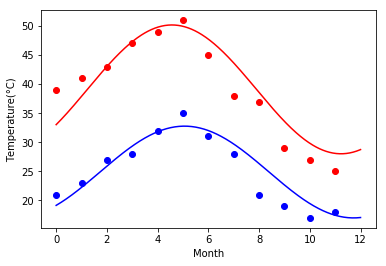

In [30]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

# Defining the temperatures as numpy arrays
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
# Getting the 12 months using arange() method to get it as an array
months = np.arange(0,12)

# yearly_temps method is used map the values for the year with respect to monthly sample of low and high temperatures
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

# Optimize.curve_fit () method is used for curve plotting which takes the yearly_temps function as an argument
# Hence the mapping will be times=months,avg=(40,-40),ampl=20,time_offset=0
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

# linspace () method gives equally distributed numbers within the given range so that we can get days for the year
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
# plot will be against the 365 days and the res_max will hold a list of three values whicg will be mapped to avg,ampl & time_offset
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
# alt + 0176 is used to get the degeree symbol
plt.ylabel('Temperature(°C)')

plt.show()

male      843
female    466
Name: sex, dtype: int64


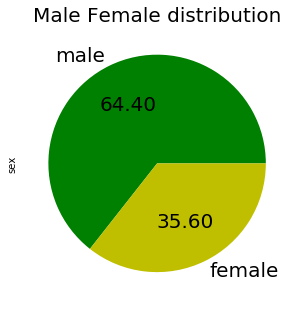

In [32]:
# Program to plot the male female distribution
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
# in-built function used to get the male,female counts
male_female = df.sex.value_counts()
print(male_female)
# Setting the caption for the plot
plt.title('Male Female distribution',fontsize=20)
# Pie chart plotting with autopct to get the percentage proportion and figsize() method to define the figure size
male_female.plot.pie(colors=['g','y'],fontsize=20,autopct='%.2f',figsize=(5,5))
plt.show()

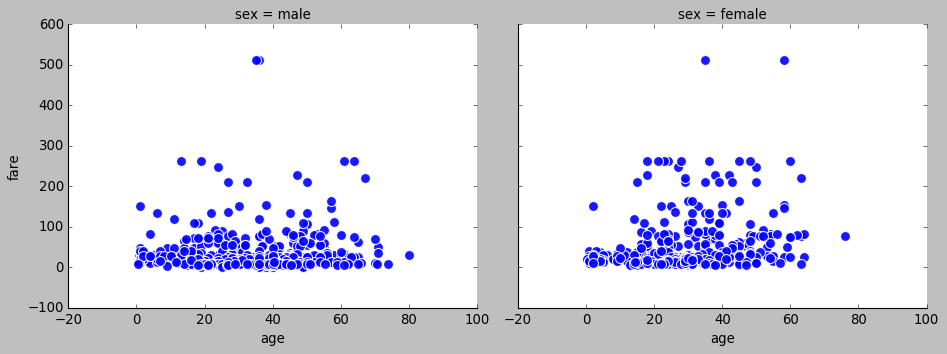

In [35]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
plt.style.use('classic')

# Dropping the NaN values as a data cleanup activity and to plot properly
titanic_df_clean_sex = df.dropna(subset=['sex'])

# Using seaborn's facetgrid style to get a grid with color order as male and female (Template formation)
base_plot = sns.FacetGrid(titanic_df_clean_sex[titanic_df_clean_sex['sex']==titanic_df_clean_sex['sex']],col='sex',col_order=['male', 'female'],height=6)
# Mapping the base plot with the sactter plot of age and fare
actual_plot = (base_plot.map(plt.scatter,'age','fare',edgecolor='w', alpha=0.9, s=80))
plt.subplots_adjust(top=0.7)

## 2.5. Problem Statement: Data Cleaning

In [42]:
# Data clean up exercise
import pandas as pd
import numpy as np
# Loading the DataFrame
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],'FlightNumber': [10045, np.nan, 10065,np.nan, 10085],'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. AirFrance', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. AirFrance
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [43]:
# The interpolate() method is used to linearly increase the values and populate them in the Flight number column
df['FlightNumber'] = df['FlightNumber'].interpolate(method='linear').astype(int)
# We first convert the column values to string and then split them with the '_' and access them using the index
temp_df = pd.DataFrame({'From':df.From_To.str.split('_').str[0].tolist()})
temp_df['To'] = df.From_To.str.split('_').str[1].tolist()
# Capitalize method is used to make the initial letter as a capital letter. 
# title() method can also be used to get camel case style.
temp_df['From'] = temp_df.From.str.capitalize()
temp_df['To'] = temp_df.To.str.capitalize()
print(temp_df)
print(df)

       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]        12. AirFrance
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"


In [44]:
# Dropping the unstructured 'From_To' column
df.drop('From_To',axis=1,inplace=True)
# concat() method is used to merge the above temporary dataframe into our dataframe
df = pd.concat([df,temp_df],axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. AirFrance,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [45]:
# tolist() method is used to expand the values and we create those as a new dataframe
Delay = pd.DataFrame(df['RecentDelays'].values.tolist())
# Renaming the columns
Delay.columns = ['FirstDelay', 'SecondDelay', 'ThirdDelay']
# Dropping the column 'RecentDelays' by specifying the value '1' - with respect to column
df = df.drop('RecentDelays', 1)

In [46]:
# Inserting new columns - (position,name of the column and the column values)
df.insert(3,"FirstDelay",Delay['FirstDelay'])
df.insert(4,"SecondDelay",Delay['SecondDelay'])
df.insert(5,"ThirdDelay",Delay['ThirdDelay'])
df

,FlightNumber,Airline,From,FirstDelay,SecondDelay,ThirdDelay,To
0,10045,KLM(!),London,23.0,47.0,NaN,Paris
1,10055,<Air France> (12),Madrid,NaN,NaN,NaN,Milan
2,10065,(British Airways. ),London,24.0,43.0,87.0,Stockholm
3,10075,12. AirFrance,Budapest,13.0,NaN,NaN,Paris
4,10085,"""Swiss Air""",Brussels,67.0,32.0,NaN,London
